# Raoult's Law
---------------------------

Raoult's law expression is

**$$ y_i P = x_i P_i^{sat} $$**

where,
- **$x_i$** is the liquid phase mole fraction
- **$y_i$** is the vapor phase mole fraction
- **$P_i^{sat}$** is the vapor pressure of pure species **$i$** at the temperature **$T$** of the system, calculated using Antoine equation
- **$y_i P$** is the partial pressure of species **$i$** and **$P$** is the total pressure

**Remember the two major assumptions in the above expression**,
- The vapor phase is an ideal gas
- The liquid phase is an ideal solution

## Example with Ethanol-Water VLE binary mixture

In [1]:
'''
We will store the antoine coefficients as a dictionary with key (str) as the name and values (tuple) as antoine coefficients corresponding to the name.
'''

ant_coeffs = {} # just to emphasize that ant_coeffs is a dictionary.

ant_coeffs.update({"Ethanol": (16.8958, 3795.17, -42.232)})
ant_coeffs.update({"Methanol": (16.5785, 3638.27, -33.650)})
ant_coeffs.update({"Water": (16.3872, 3885.70, -42.980)})

ant_coeffs

{'Ethanol': (16.8958, 3795.17, -42.232),
 'Methanol': (16.5785, 3638.27, -33.65),
 'Water': (16.3872, 3885.7, -42.98)}

Calculate $y_{ethanol}$, $y_{water}$, $P_{ethanol}$, $P_{water}$ at 363.15 K when $x_{ethanol}$ is 0.3 . Assume Ethanol-Water forms an ideal binary mixture (i.e., assume Raoult's law works)

In [2]:
# say subscript 1 represents ethanol & subscript 2 represents water

import numpy as np

def Pi_sat(ant_coeff: tuple, T: float) -> float:
    A, B, C = ant_coeff # this unpacks the tuple
    return np.exp(A - B/(C+T))

T = 363.15 # given in question
x_1 = 0.3 # given in question
x_2 = 1-x_1 # as x1 + x2 = 1

P_1 = x_1*Pi_sat(ant_coeffs["Ethanol"], T) # P_1 is the partial pressure of ethanol
P_2 = x_2*Pi_sat(ant_coeffs["Water"], T) # P_2 is the partial pressure of water

P_total = P_1 + P_2 # P_total is the total pressure of the ethanol-water mixture

y_1 = P_1/P_total # vapor mole fraction of ethanol
y_2 = P_2/P_total # vapor mole fraction of water and note y_2 can also be calculated as 1 - y_1

print(f'1) Ethanol: \n\t Liquid mole fraction: {x_1} \n\t Vapor mole fraction: {y_1:1.4f} \n\t Partial pressure: {P_1:1.4f} kPa\n')
print(f'2) Water: \n\t Liquid mole fraction: {x_2} \n\t Vapor mole fraction: {y_2:1.4f} \n\t Partial pressure: {P_2:1.4f} kPa\n')

1) Ethanol: 
	 Liquid mole fraction: 0.3 
	 Vapor mole fraction: 0.4929 
	 Partial pressure: 47.7437 kPa

2) Water: 
	 Liquid mole fraction: 0.7 
	 Vapor mole fraction: 0.5071 
	 Partial pressure: 49.1148 kPa



## $P_{xy}$, $T_{xy}$ plots for Ethanol-Water VLE binary mixture

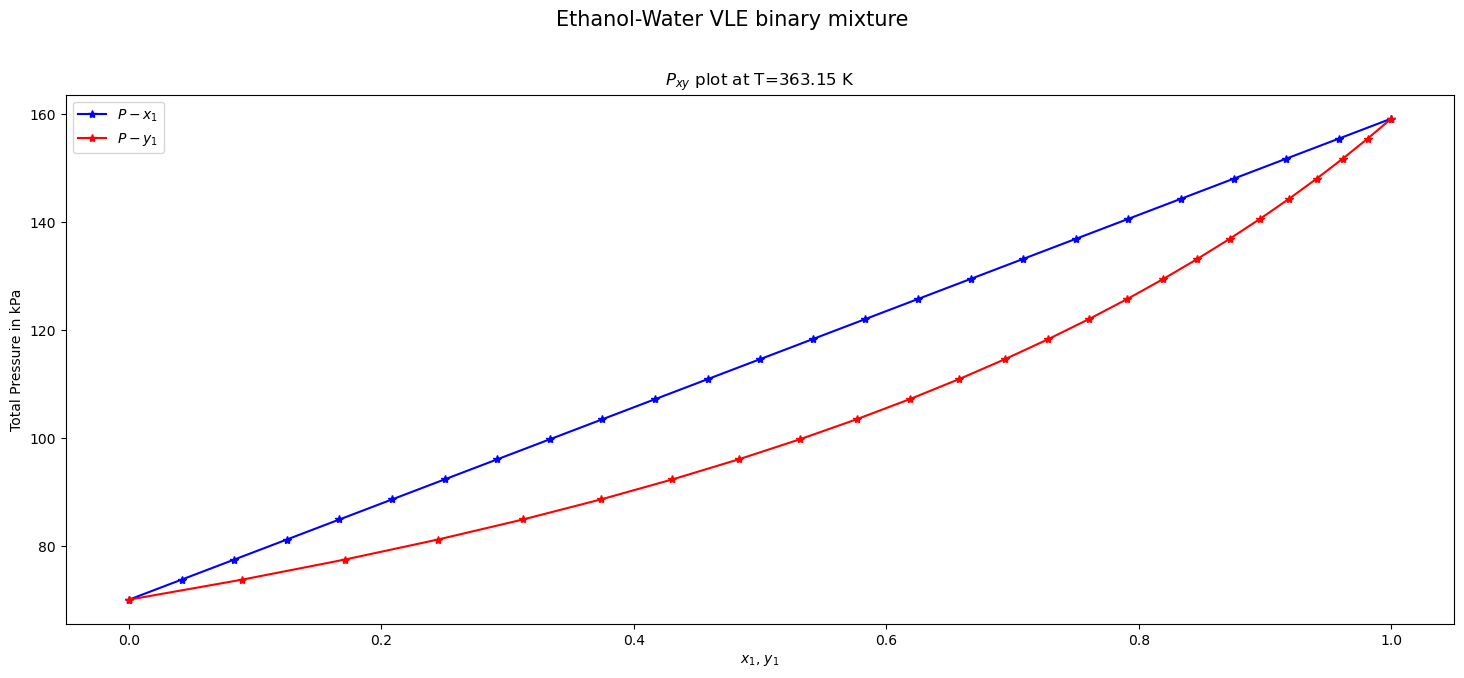

In [3]:
import matplotlib.pyplot as plt

def P_xy(component_1: str, component_2: str, T: float, n_pts:int = 25) -> tuple[list, list, list]:
    x1_range = np.linspace(0.0, 1.0, n_pts)
    x2_range = 1 - x1_range
    P1_range = x1_range*Pi_sat(ant_coeffs[component_1], T)
    P2_range = x2_range*Pi_sat(ant_coeffs[component_2], T)
    P_range = P1_range + P2_range
    y1_range = P1_range/P_range
    return x1_range, y1_range, P_range

def plot_Pxy(component_1: str, component_2: str, T: float, n_pts:int = 25, ax = None):
    x1_arr, y1_arr, Pxy_arr = P_xy(component_1, component_2, T, n_pts)
    ax.plot(x1_arr, Pxy_arr, "b*-", label="$P-x_1$")
    ax.plot(y1_arr, Pxy_arr, "r*-", label="$P-y_1$")
    ax.set_xlabel("$x_1$, $y_1$")
    ax.set_ylabel("Total Pressure in kPa")
    ax.legend()
    ax.set_title("$P_{xy}$ plot " + f"at T={T} K")
    return ax
    
component_1 = "Ethanol"
component_2 = "Water"

fig, ax = plt.subplots(1, figsize=(15, 7))
ax = plot_Pxy(component_1, component_2, T=363.15, ax=ax)
plt.suptitle(f"{component_1}-{component_2} VLE binary mixture", fontsize=15)
fig.tight_layout(pad=2.0)
plt.show()

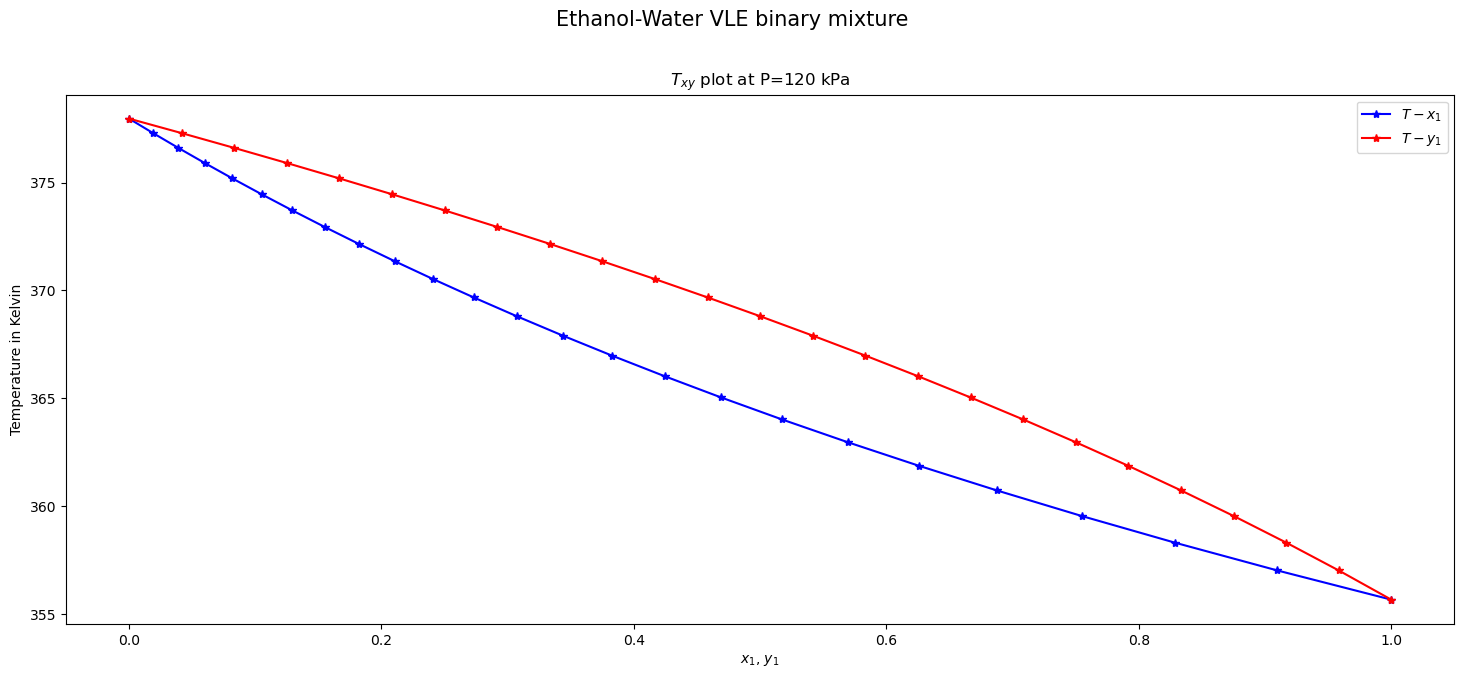

In [4]:
from scipy.optimize import fsolve

def T_xy(component_1: str, component_2: str, P: float, n_pts:int = 25) -> tuple[list, list, list]:               
    y1_range = np.linspace(0.0, 1.0, n_pts)
    x1_range = np.zeros(len(y1_range))
    T_range = np.zeros(len(y1_range))
    for i, y1 in enumerate(y1_range):
        def find_state(roots): 
            x1, T = roots
            expr_1 = P*y1 - x1*Pi_sat(ant_coeffs[component_1], T)
            expr_2 = P*(1-y1) - (1-x1)*Pi_sat(ant_coeffs[component_2], T)
            return expr_1, expr_2
        x1_range[i], T_range[i] = fsolve(find_state, [0.5, 350])
    return x1_range, y1_range, T_range

def plot_Txy(component_1: str, component_2: str, P: float, n_pts:int = 25, ax = None):
    x1_arr, y1_arr, Txy_arr = T_xy(component_1, component_2, P, n_pts)
    ax.plot(x1_arr, Txy_arr, "b*-", label="$T-x_1$")
    ax.plot(y1_arr, Txy_arr, "r*-", label="$T-y_1$")
    ax.set_xlabel("$x_1$, $y_1$")
    ax.set_ylabel("Temperature in Kelvin")
    ax.legend()
    ax.set_title("$T_{xy}$ plot " + f"at P={P} kPa")
    return ax

component_1 = "Ethanol"
component_2 = "Water"

fig, ax = plt.subplots(1, figsize=(15, 7))
ax = plot_Txy(component_1, component_2, P=120, ax=ax)
plt.suptitle(f"{component_1}-{component_2} VLE binary mixture", fontsize=15)
fig.tight_layout(pad=2.0)
plt.show()

## Classwork

Plot $P_{xy}$ at T = 363.15 K and $T_{xy}$ at P = 120 kPa for a Methanol-Water VLE binary mixture.

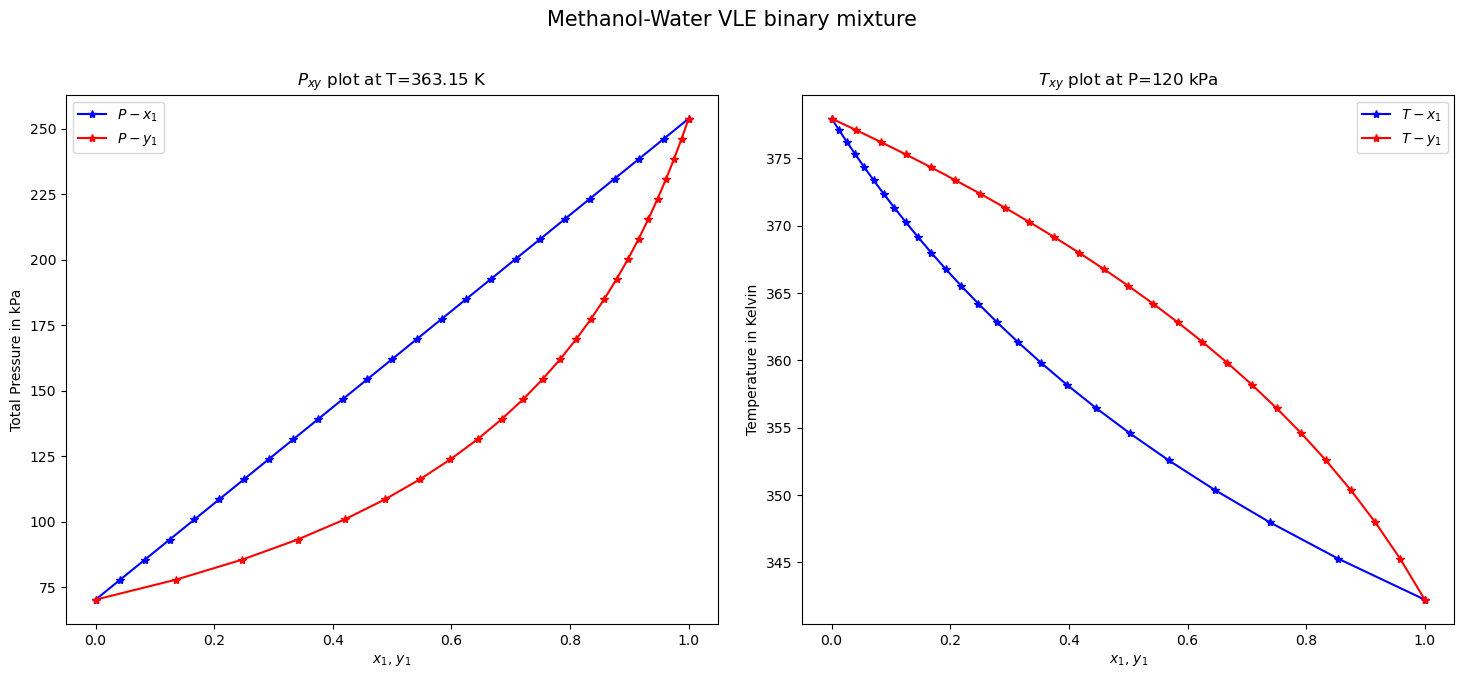

In [5]:
component_1 = "Methanol"
component_2 = "Water"

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0] = plot_Pxy(component_1, component_2, T=363.15, ax=axes[0])
axes[1] = plot_Txy(component_1, component_2, P=120, ax=axes[1])
plt.suptitle(f"{component_1}-{component_2} VLE binary mixture", fontsize=15)
fig.tight_layout(pad=2.0)
plt.show()